<a href="https://colab.research.google.com/github/AlishDuwal10/Final/blob/main/2461817_AlishDuwal_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Portfolio Project - Classification Task
## Crop Prediction Based on Soil and Environmental Features

**Student Name:** Alish Duwal  
**Student ID:** 2461817  
**Group:** L5CG2  

**UN Sustainable Development Goal:** SDG 2 - Zero Hunger  
**Objective:** Predict the type of crop to be grown based on soil nutrients and environmental conditions

## 1. Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Classical ML Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Neural Network
from sklearn.neural_network import MLPClassifier

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif, RFE

# Set random seed for reproducibility
np.random.seed(42)

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('Set2')

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. Load and Explore Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/FinalAssessment/sensor_Crop_Dataset.csv', encoding='latin1')

print("Dataset Shape:", df.shape)
print("\n" + "="*50)
print("First 5 rows:")
df.head()

Dataset Shape: (20000, 10)

First 5 rows:


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Soil_Type,Variety
0,69.074766,53.954402,88.067625,17.261834,72.941652,4.631301,302.842639,Wheat,Clay,Soft Red
1,107.329352,70.102134,32.081067,21.846116,99.361954,4.761658,94.693847,Tomato,Clay,Beefsteak
2,130.634624,67.204533,28.294252,33.246895,81.506836,6.566007,83.563685,Sugarcane,Clay,Co 86032
3,15.169301,87.493181,14.336679,14.396289,59.274465,6.296297,31.508836,Sugarcane,Silt,Co 0238
4,21.881965,89.269712,38.833885,16.773218,51.191584,8.268274,295.193482,Maize,Sandy,Sweet


In [4]:
# Dataset Information
print("Dataset Information:")
print("="*50)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     20000 non-null  float64
 1   Phosphorus   20000 non-null  float64
 2   Potassium    20000 non-null  float64
 3   Temperature  20000 non-null  float64
 4   Humidity     20000 non-null  float64
 5   pH_Value     20000 non-null  float64
 6   Rainfall     20000 non-null  float64
 7   Crop         20000 non-null  object 
 8   Soil_Type    20000 non-null  object 
 9   Variety      20000 non-null  object 
dtypes: float64(7), object(3)
memory usage: 1.5+ MB


In [5]:
# Check for missing values
print("Missing Values:")
print("="*50)
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing Values:
Series([], dtype: int64)

Total missing values: 0


In [6]:
# Statistical Summary
print("Statistical Summary of Numerical Features:")
print("="*50)
df.describe()

Statistical Summary of Numerical Features:


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,77.216965,47.482070,55.162956,27.420717,64.897753,6.496126,211.124002
std,41.857663,24.587506,25.969091,10.010144,20.200687,1.155750,109.724973
min,5.006013,5.000483,10.000672,10.003760,30.002297,4.500082,20.018991
25%,40.459715,26.225044,32.641905,18.880888,47.462026,5.497988,117.208556
50%,77.573159,47.469579,55.248133,27.366450,64.776613,6.493812,211.263577
75%,113.055595,68.625556,77.690183,35.997484,82.310482,7.501771,305.668849
max,149.998785,89.999086,99.996480,44.997407,99.992346,8.499914,399.974915


In [7]:
# Check target variable distribution
print("Target Variable (Crop) Distribution:")
print("="*50)
print(df['Crop'].value_counts())
print(f"\nNumber of unique crops: {df['Crop'].nunique()}")

Target Variable (Crop) Distribution:
Crop
Wheat        3390
Potato       3362
Maize        3352
Tomato       3344
Sugarcane    3284
Rice         3268
Name: count, dtype: int64

Number of unique crops: 6


## 3. Exploratory Data Analysis (EDA)

### 3.1 Data Cleaning

In [8]:
# Handle missing values if any
print("Handling missing values...")
df_clean = df.dropna()
print(f"Rows after removing missing values: {len(df_clean)}")
print(f"Rows removed: {len(df) - len(df_clean)}")

Handling missing values...
Rows after removing missing values: 20000
Rows removed: 0


In [9]:
# Select relevant features for crop prediction
# We'll use environmental features: Nitrogen, Phosphorus, Potassium, Temperature, Humidity, pH_Value, Rainfall
print("Selected Features for Crop Prediction:")
print("="*50)
selected_features = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']
print("Features:", selected_features)
print("Target: Crop")

Selected Features for Crop Prediction:
Features: ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']
Target: Crop


### 3.2 Visualizations

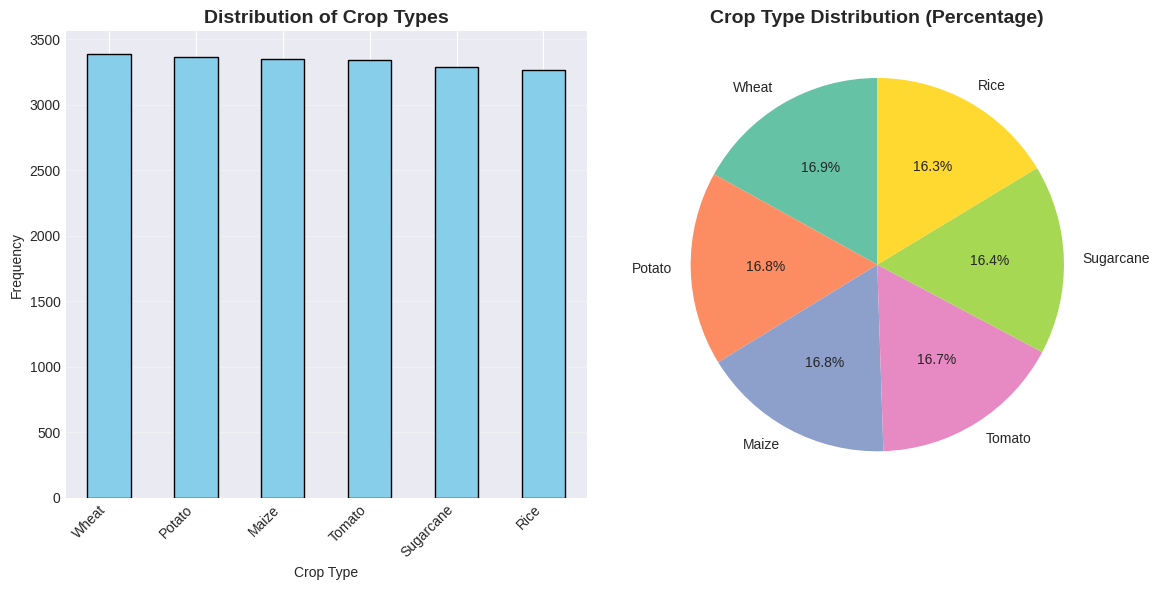

Insight: The dataset shows distribution of different crop types.


In [10]:
# Crop distribution visualization
plt.figure(figsize=(12, 6))
crop_counts = df_clean['Crop'].value_counts()
plt.subplot(1, 2, 1)
crop_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Crop Types', fontsize=14, fontweight='bold')
plt.xlabel('Crop Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
crop_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Crop Type Distribution (Percentage)', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

print("Insight: The dataset shows distribution of different crop types.")

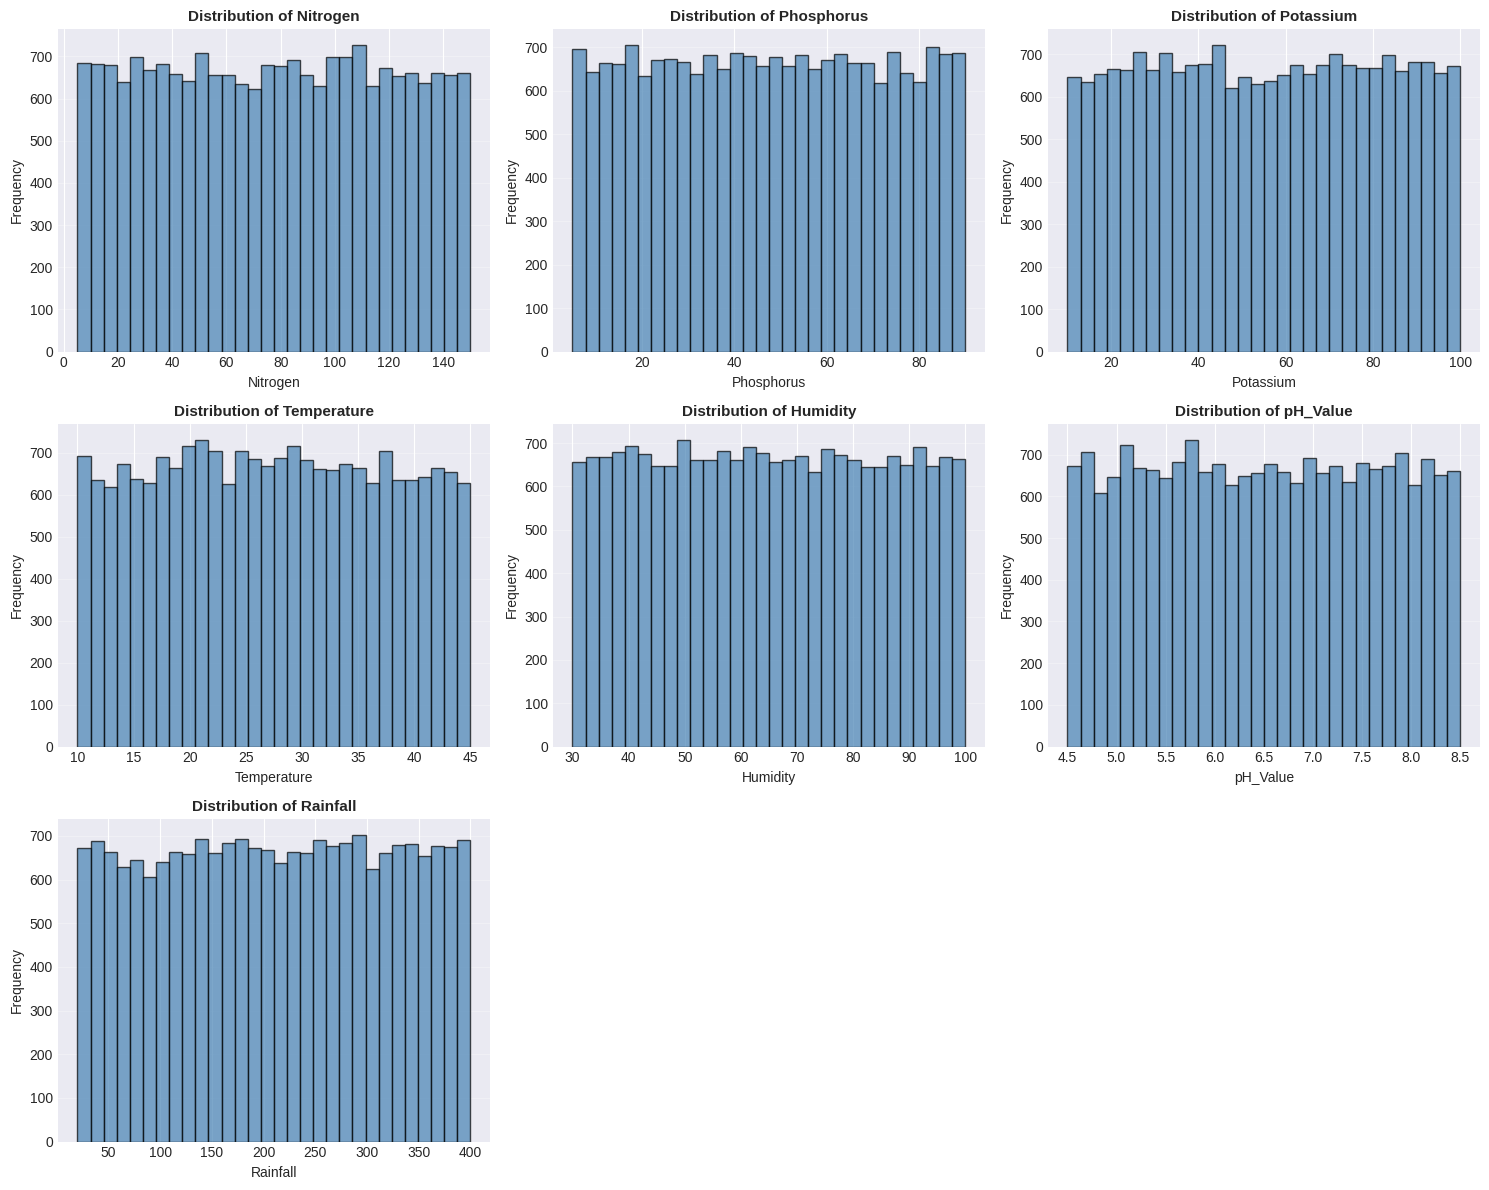

Insight: Histograms show the distribution of environmental and soil features.
Most features appear to have varied distributions across different ranges.


In [11]:
# Distribution of numerical features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(selected_features):
    axes[idx].hist(df_clean[col], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

# Hide extra subplots
for idx in range(len(selected_features), 9):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("Insight: Histograms show the distribution of environmental and soil features.")
print("Most features appear to have varied distributions across different ranges.")

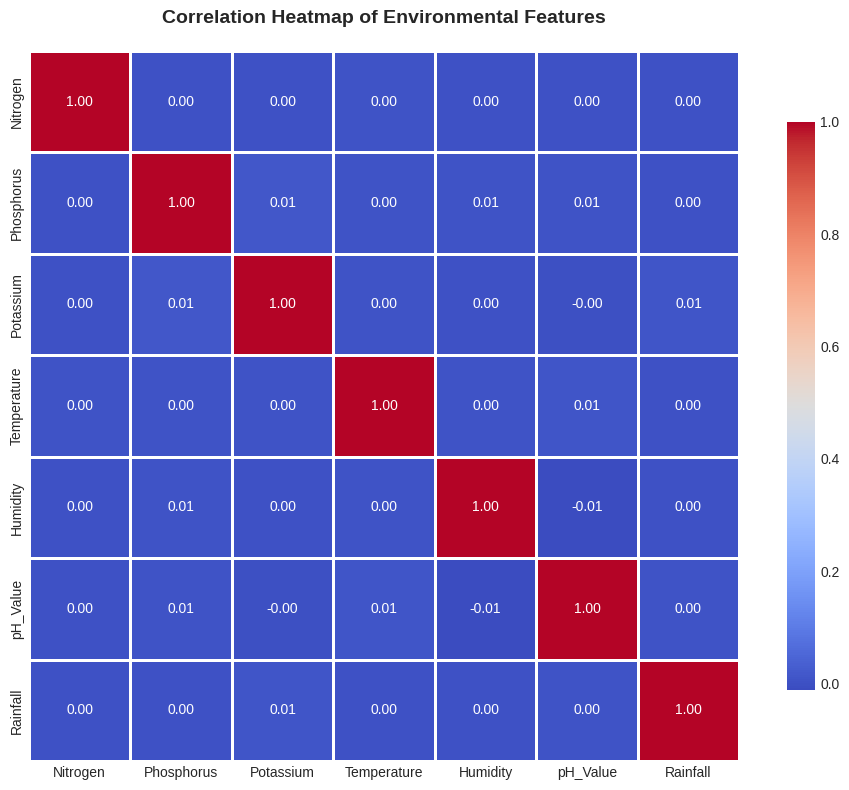

Insight: The correlation heatmap reveals relationships between features.
Features with low correlation are more independent and valuable for prediction.


In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean[selected_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Environmental Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("Insight: The correlation heatmap reveals relationships between features.")
print("Features with low correlation are more independent and valuable for prediction.")

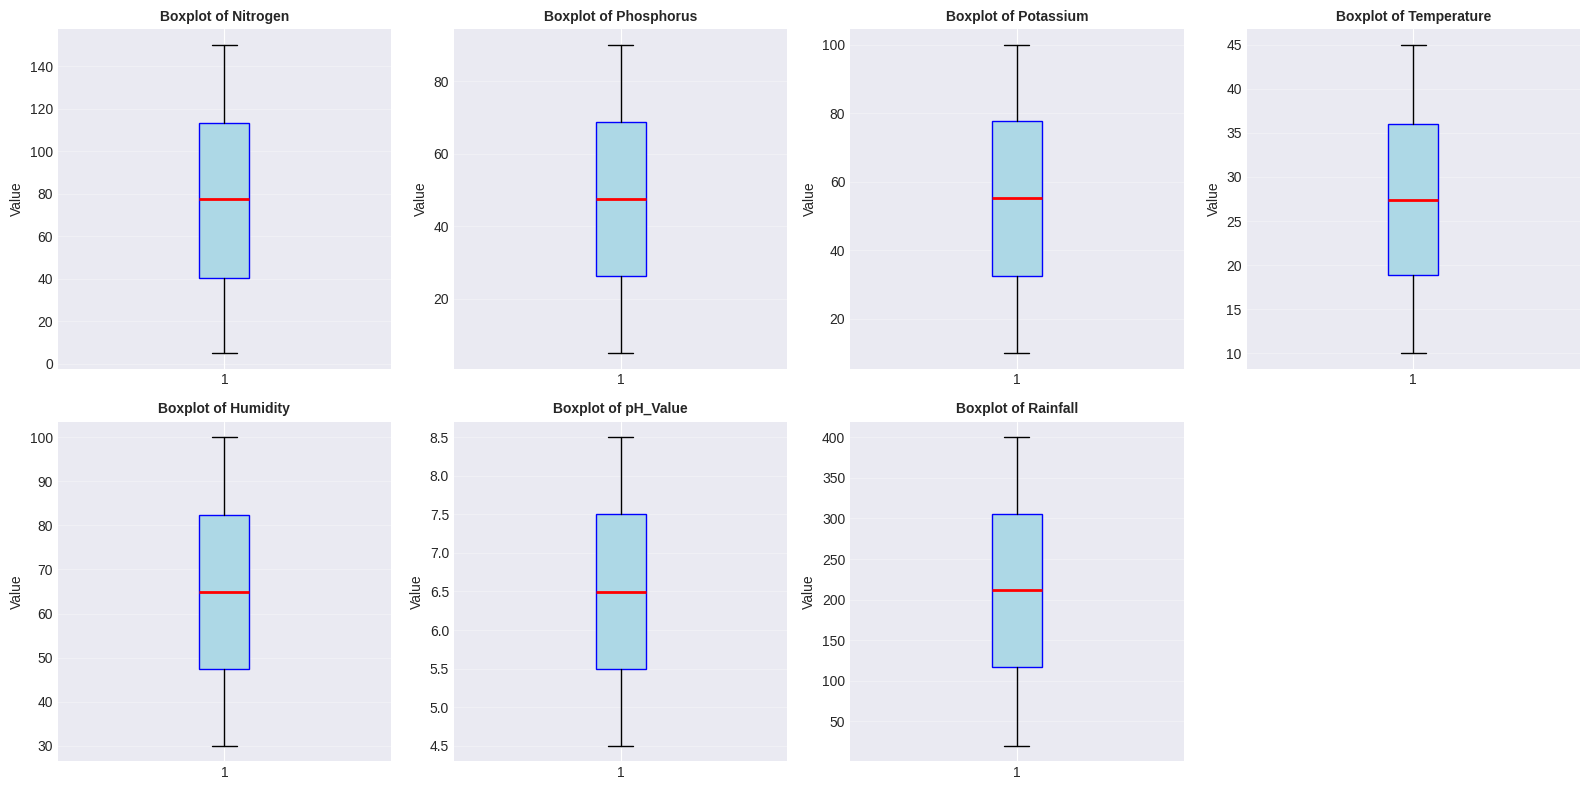

Insight: Boxplots help identify outliers in the dataset.
Some features may have extreme values that could affect model performance.


In [13]:
# Boxplot for outlier detection
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for idx, col in enumerate(selected_features):
    axes[idx].boxplot(df_clean[col], vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', color='blue'),
                     medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'Boxplot of {col}', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(axis='y', alpha=0.3)

# Hide extra subplot
axes[7].axis('off')

plt.tight_layout()
plt.show()

print("Insight: Boxplots help identify outliers in the dataset.")
print("Some features may have extreme values that could affect model performance.")

## 4. Data Preprocessing

In [14]:
# Prepare features (X) and target (y)
X = df_clean[selected_features]
y = df_clean['Crop']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nNumber of samples:", len(X))
print("Number of features:", X.shape[1])
print("Number of classes:", y.nunique())

Features (X) shape: (20000, 7)
Target (y) shape: (20000,)

Number of samples: 20000
Number of features: 7
Number of classes: 6


In [15]:
# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Target variable encoded successfully!")
print("Classes:", le.classes_)
print("\nEncoded target shape:", y_encoded.shape)

Target variable encoded successfully!
Classes: ['Maize' 'Potato' 'Rice' 'Sugarcane' 'Tomato' 'Wheat']

Encoded target shape: (20000,)


In [16]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Data split successfully!")
print("="*50)
print(f"Training set size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing set size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print("\nTraining features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)

Data split successfully!
Training set size: 16000 (80.0%)
Testing set size: 4000 (20.0%)

Training features shape: (16000, 7)
Testing features shape: (4000, 7)


In [17]:
# Feature Scaling (Important for Neural Networks and some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully using StandardScaler!")
print("\nScaled training features shape:", X_train_scaled.shape)
print("Scaled testing features shape:", X_test_scaled.shape)

Features scaled successfully using StandardScaler!

Scaled training features shape: (16000, 7)
Scaled testing features shape: (4000, 7)


## 5. Task 1: Build Neural Network Model (MLPClassifier)

**Architecture:**
- Input Layer: 7 features
- Hidden Layer 1: 64 neurons with ReLU activation
- Hidden Layer 2: 32 neurons with ReLU activation
- Output Layer: Number of crop classes with Softmax (implicit)
- Loss Function: Cross-Entropy Loss
- Optimizer: Adam
- Learning Rate: 0.001 (default)

In [18]:
# Build Neural Network Classifier
nn_classifier = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # Two hidden layers: 64 and 32 neurons
    activation='relu',             # ReLU activation function
    solver='adam',                 # Adam optimizer
    learning_rate_init=0.001,      # Learning rate
    max_iter=500,                  # Maximum iterations
    random_state=42,
    early_stopping=True,           # Use early stopping to prevent overfitting
    validation_fraction=0.1,       # 10% of training data for validation
    verbose=False
)

print("Neural Network Architecture:")
print("="*50)
print("Input Layer: 7 features")
print("Hidden Layer 1: 64 neurons (ReLU activation)")
print("Hidden Layer 2: 32 neurons (ReLU activation)")
print(f"Output Layer: {len(le.classes_)} neurons (Softmax activation)")
print("\nOptimizer: Adam")
print("Loss Function: Cross-Entropy Loss")
print("Learning Rate: 0.001")
print("Max Iterations: 500")
print("Early Stopping: Enabled")

Neural Network Architecture:
Input Layer: 7 features
Hidden Layer 1: 64 neurons (ReLU activation)
Hidden Layer 2: 32 neurons (ReLU activation)
Output Layer: 6 neurons (Softmax activation)

Optimizer: Adam
Loss Function: Cross-Entropy Loss
Learning Rate: 0.001
Max Iterations: 500
Early Stopping: Enabled


In [19]:
# Train the Neural Network
print("Training Neural Network...")
nn_classifier.fit(X_train_scaled, y_train)
print("✓ Neural Network training completed!")
print(f"\nNumber of iterations: {nn_classifier.n_iter_}")
print(f"Loss: {nn_classifier.loss_:.4f}")

Training Neural Network...
✓ Neural Network training completed!

Number of iterations: 13
Loss: 1.7801


In [20]:
# Evaluate Neural Network on Training Set
y_train_pred_nn = nn_classifier.predict(X_train_scaled)

print("Neural Network - Training Set Performance:")
print("="*50)
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_nn):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred_nn, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_train, y_train_pred_nn, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_train, y_train_pred_nn, average='weighted'):.4f}")

Neural Network - Training Set Performance:
Accuracy: 0.1825
Precision: 0.1819
Recall: 0.1825
F1-Score: 0.1717


In [21]:
# Evaluate Neural Network on Test Set
y_test_pred_nn = nn_classifier.predict(X_test_scaled)

print("Neural Network - Test Set Performance:")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_nn):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_nn, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_nn, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_nn, average='weighted'):.4f}")

print("\n" + "="*50)
print("Classification Report:")
print("="*50)
print(classification_report(y_test, y_test_pred_nn, target_names=le.classes_))

Neural Network - Test Set Performance:
Accuracy: 0.1680
Precision: 0.1674
Recall: 0.1680
F1-Score: 0.1584

Classification Report:
              precision    recall  f1-score   support

       Maize       0.18      0.15      0.17       670
      Potato       0.16      0.13      0.14       672
        Rice       0.14      0.08      0.10       654
   Sugarcane       0.18      0.09      0.12       657
      Tomato       0.17      0.31      0.22       669
       Wheat       0.17      0.25      0.20       678

    accuracy                           0.17      4000
   macro avg       0.17      0.17      0.16      4000
weighted avg       0.17      0.17      0.16      4000



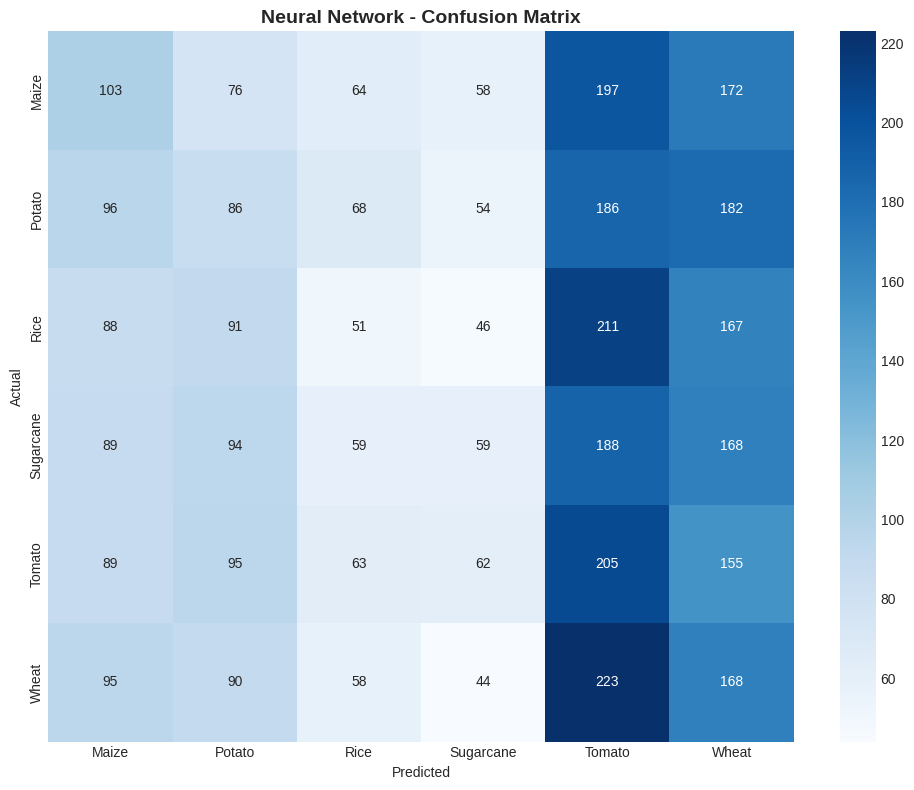

In [22]:
# Confusion Matrix for Neural Network
cm_nn = confusion_matrix(y_test, y_test_pred_nn)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Neural Network - Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

## 6. Task 2: Build Two Classical ML Models

### 6.1 Model 1: Random Forest Classifier

In [23]:
# Build Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

print("Training Random Forest Classifier...")
rf_classifier.fit(X_train_scaled, y_train)
print("✓ Random Forest training completed!")

Training Random Forest Classifier...
✓ Random Forest training completed!


In [24]:
# Evaluate Random Forest on Test Set
y_test_pred_rf = rf_classifier.predict(X_test_scaled)

print("Random Forest - Test Set Performance:")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_rf, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_rf, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_rf, average='weighted'):.4f}")

Random Forest - Test Set Performance:
Accuracy: 0.1550
Precision: 0.1549
Recall: 0.1550
F1-Score: 0.1548


### 6.2 Model 2: Logistic Regression

In [25]:
# Build Logistic Regression Classifier
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)

print("Training Logistic Regression Classifier...")
lr_classifier.fit(X_train_scaled, y_train)
print("✓ Logistic Regression training completed!")

Training Logistic Regression Classifier...
✓ Logistic Regression training completed!


In [26]:
# Evaluate Logistic Regression on Test Set
y_test_pred_lr = lr_classifier.predict(X_test_scaled)

print("Logistic Regression - Test Set Performance:")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_lr, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_lr, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_lr, average='weighted'):.4f}")

Logistic Regression - Test Set Performance:
Accuracy: 0.1787
Precision: 0.1801
Recall: 0.1787
F1-Score: 0.1702


## 7. Task 3: Hyperparameter Optimization with Cross-Validation

### 7.1 Random Forest Hyperparameter Tuning

In [29]:
# Define parameter grid for Random Forest (reduced for faster execution)
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

print("Random Forest - Hyperparameter Grid:")
print("="*50)
for param, values in rf_param_grid.items():
    print(f"{param}: {values}")

print(f"\nTotal combinations: {np.prod([len(v) for v in rf_param_grid.values()])}")

Random Forest - Hyperparameter Grid:
n_estimators: [50, 100]
max_depth: [10, None]
min_samples_split: [2]
min_samples_leaf: [1]

Total combinations: 4


In [32]:
# Perform GridSearchCV for Random Forest
print("\nPerforming GridSearchCV for Random Forest...")
print("This may take a few minutes...")

rf_grid_search= GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,  # Changed from param_distributions to param_grid
    cv=3,               # reduce CV
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)


rf_grid_search.fit(X_train, y_train)

print("\n✓ GridSearchCV completed for Random Forest!")
print("\nBest Hyperparameters:")
print("="*50)
for param, value in rf_grid_search.best_params_.items():
    print(f"{param}: {value}")
print(f"\nBest Cross-Validation Score: {rf_grid_search.best_score_:.4f}")


Performing GridSearchCV for Random Forest...
This may take a few minutes...
Fitting 3 folds for each of 4 candidates, totalling 12 fits

✓ GridSearchCV completed for Random Forest!

Best Hyperparameters:
max_depth: 10
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 50

Best Cross-Validation Score: 0.1674


### 7.2 Logistic Regression Hyperparameter Tuning

In [33]:
# Define parameter grid for Logistic Regression (reduced for faster execution)
lr_param_grid = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2']
}

print("Logistic Regression - Hyperparameter Grid:")
print("="*50)
for param, values in lr_param_grid.items():
    print(f"{param}: {values}")

print(f"\nTotal combinations: {np.prod([len(v) for v in lr_param_grid.values()])}")

Logistic Regression - Hyperparameter Grid:
C: [0.1, 1.0, 10.0]
solver: ['lbfgs', 'liblinear']
penalty: ['l2']

Total combinations: 6


In [34]:
# Perform GridSearchCV for Logistic Regression
print("\nPerforming GridSearchCV for Logistic Regression...")

lr_grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    lr_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

lr_grid_search.fit(X_train_scaled, y_train)

print("\n✓ GridSearchCV completed for Logistic Regression!")
print("\nBest Hyperparameters:")
print("="*50)
for param, value in lr_grid_search.best_params_.items():
    print(f"{param}: {value}")
print(f"\nBest Cross-Validation Score: {lr_grid_search.best_score_:.4f}")


Performing GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

✓ GridSearchCV completed for Logistic Regression!

Best Hyperparameters:
C: 0.1
penalty: l2
solver: liblinear

Best Cross-Validation Score: 0.1687


## 8. Task 4: Feature Selection

We will use SelectKBest with f_classif for feature selection.

In [35]:
# Feature Selection using SelectKBest
k_best = 5  # Select top 5 features

selector = SelectKBest(score_func=f_classif, k=k_best)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = [selected_features[i] for i in selected_feature_indices]

print("Feature Selection Results:")
print("="*50)
print(f"Method: SelectKBest with f_classif")
print(f"Number of features selected: {k_best}")
print(f"\nSelected Features: {selected_feature_names}")
print(f"\nFeature Scores:")
for i, (feature, score) in enumerate(zip(selected_features, selector.scores_)):
    selected = "✓" if i in selected_feature_indices else "✗"
    print(f"{selected} {feature}: {score:.2f}")

Feature Selection Results:
Method: SelectKBest with f_classif
Number of features selected: 5

Selected Features: ['Nitrogen', 'Phosphorus', 'Temperature', 'Humidity', 'pH_Value']

Feature Scores:
✓ Nitrogen: 2.67
✓ Phosphorus: 1.84
✗ Potassium: 0.75
✓ Temperature: 2.02
✓ Humidity: 1.28
✓ pH_Value: 1.95
✗ Rainfall: 1.15


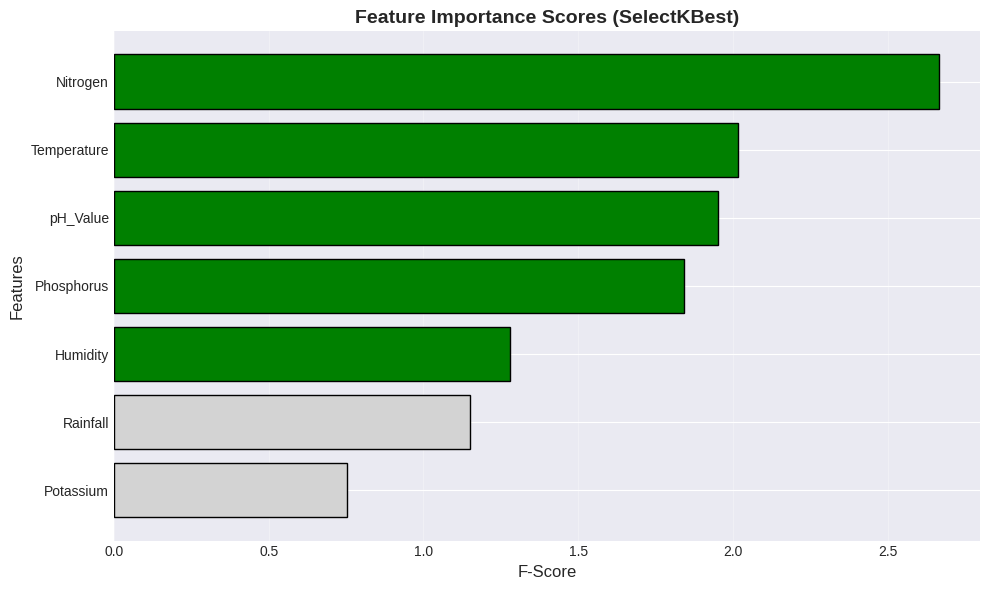


Green bars indicate selected features for final models.


In [36]:
# Visualize feature importance scores
plt.figure(figsize=(10, 6))
feature_scores = pd.DataFrame({
    'Feature': selected_features,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

colors = ['green' if f in selected_feature_names else 'lightgray' for f in feature_scores['Feature']]

plt.barh(feature_scores['Feature'], feature_scores['Score'], color=colors, edgecolor='black')
plt.xlabel('F-Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance Scores (SelectKBest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nGreen bars indicate selected features for final models.")

## 9. Task 5: Final Models with Optimal Hyperparameters and Selected Features

### 9.1 Final Random Forest Model

In [37]:
# Build final Random Forest model with best parameters and selected features
final_rf = RandomForestClassifier(**rf_grid_search.best_params_, random_state=42)

print("Training Final Random Forest Model...")
print("="*50)
print("Features used:", selected_feature_names)
print("Number of features:", len(selected_feature_names))
print("\nHyperparameters:")
for param, value in rf_grid_search.best_params_.items():
    print(f"  {param}: {value}")

final_rf.fit(X_train_selected, y_train)
print("\n✓ Final Random Forest model trained!")

Training Final Random Forest Model...
Features used: ['Nitrogen', 'Phosphorus', 'Temperature', 'Humidity', 'pH_Value']
Number of features: 5

Hyperparameters:
  max_depth: 10
  min_samples_leaf: 1
  min_samples_split: 2
  n_estimators: 50

✓ Final Random Forest model trained!


In [38]:
# Evaluate final Random Forest model
y_test_pred_rf_final = final_rf.predict(X_test_selected)

# Get cross-validation score
rf_cv_score = cross_val_score(final_rf, X_train_selected, y_train, cv=5, scoring='accuracy').mean()

rf_final_accuracy = accuracy_score(y_test, y_test_pred_rf_final)
rf_final_precision = precision_score(y_test, y_test_pred_rf_final, average='weighted')
rf_final_recall = recall_score(y_test, y_test_pred_rf_final, average='weighted')
rf_final_f1 = f1_score(y_test, y_test_pred_rf_final, average='weighted')

print("Final Random Forest - Test Set Performance:")
print("="*50)
print(f"CV Score: {rf_cv_score:.4f}")
print(f"Accuracy: {rf_final_accuracy:.4f}")
print(f"Precision: {rf_final_precision:.4f}")
print(f"Recall: {rf_final_recall:.4f}")
print(f"F1-Score: {rf_final_f1:.4f}")

Final Random Forest - Test Set Performance:
CV Score: 0.1713
Accuracy: 0.1635
Precision: 0.1630
Recall: 0.1635
F1-Score: 0.1628


### 9.2 Final Logistic Regression Model

In [39]:
# Build final Logistic Regression model with best parameters and selected features
final_lr = LogisticRegression(**lr_grid_search.best_params_, max_iter=1000, random_state=42)

print("Training Final Logistic Regression Model...")
print("="*50)
print("Features used:", selected_feature_names)
print("Number of features:", len(selected_feature_names))
print("\nHyperparameters:")
for param, value in lr_grid_search.best_params_.items():
    print(f"  {param}: {value}")

final_lr.fit(X_train_selected, y_train)
print("\n✓ Final Logistic Regression model trained!")

Training Final Logistic Regression Model...
Features used: ['Nitrogen', 'Phosphorus', 'Temperature', 'Humidity', 'pH_Value']
Number of features: 5

Hyperparameters:
  C: 0.1
  penalty: l2
  solver: liblinear

✓ Final Logistic Regression model trained!


In [40]:
# Evaluate final Logistic Regression model
y_test_pred_lr_final = final_lr.predict(X_test_selected)

# Get cross-validation score
lr_cv_score = cross_val_score(final_lr, X_train_selected, y_train, cv=5, scoring='accuracy').mean()

lr_final_accuracy = accuracy_score(y_test, y_test_pred_lr_final)
lr_final_precision = precision_score(y_test, y_test_pred_lr_final, average='weighted')
lr_final_recall = recall_score(y_test, y_test_pred_lr_final, average='weighted')
lr_final_f1 = f1_score(y_test, y_test_pred_lr_final, average='weighted')

print("Final Logistic Regression - Test Set Performance:")
print("="*50)
print(f"CV Score: {lr_cv_score:.4f}")
print(f"Accuracy: {lr_final_accuracy:.4f}")
print(f"Precision: {lr_final_precision:.4f}")
print(f"Recall: {lr_final_recall:.4f}")
print(f"F1-Score: {lr_final_f1:.4f}")

Final Logistic Regression - Test Set Performance:
CV Score: 0.1721
Accuracy: 0.1777
Precision: 0.1813
Recall: 0.1777
F1-Score: 0.1641


## 10. Task 6: Final Model Comparison

Comparison of all models including Neural Network and optimized classical models.

In [41]:
# Create comprehensive comparison table
comparison_data = {
    'Model': [
        'Neural Network (MLP)',
        'Random Forest (Optimized)',
        'Logistic Regression (Optimized)'
    ],
    'Features Used': [
        f'All ({len(selected_features)})',
        f'Selected ({len(selected_feature_names)})',
        f'Selected ({len(selected_feature_names)})'
    ],
    'CV Score': [
        'N/A',
        f'{rf_cv_score:.4f}',
        f'{lr_cv_score:.4f}'
    ],
    'Accuracy': [
        f'{accuracy_score(y_test, y_test_pred_nn):.4f}',
        f'{rf_final_accuracy:.4f}',
        f'{lr_final_accuracy:.4f}'
    ],
    'Precision': [
        f'{precision_score(y_test, y_test_pred_nn, average="weighted"):.4f}',
        f'{rf_final_precision:.4f}',
        f'{lr_final_precision:.4f}'
    ],
    'Recall': [
        f'{recall_score(y_test, y_test_pred_nn, average="weighted"):.4f}',
        f'{rf_final_recall:.4f}',
        f'{lr_final_recall:.4f}'
    ],
    'F1-Score': [
        f'{f1_score(y_test, y_test_pred_nn, average="weighted"):.4f}',
        f'{rf_final_f1:.4f}',
        f'{lr_final_f1:.4f}'
    ]
}

comparison_df = pd.DataFrame(comparison_data)

print("\n" + "="*80)
print("FINAL MODEL COMPARISON TABLE")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)


FINAL MODEL COMPARISON TABLE
                          Model Features Used CV Score Accuracy Precision Recall F1-Score
           Neural Network (MLP)       All (7)      N/A   0.1680    0.1674 0.1680   0.1584
      Random Forest (Optimized)  Selected (5)   0.1713   0.1635    0.1630 0.1635   0.1628
Logistic Regression (Optimized)  Selected (5)   0.1721   0.1777    0.1813 0.1777   0.1641


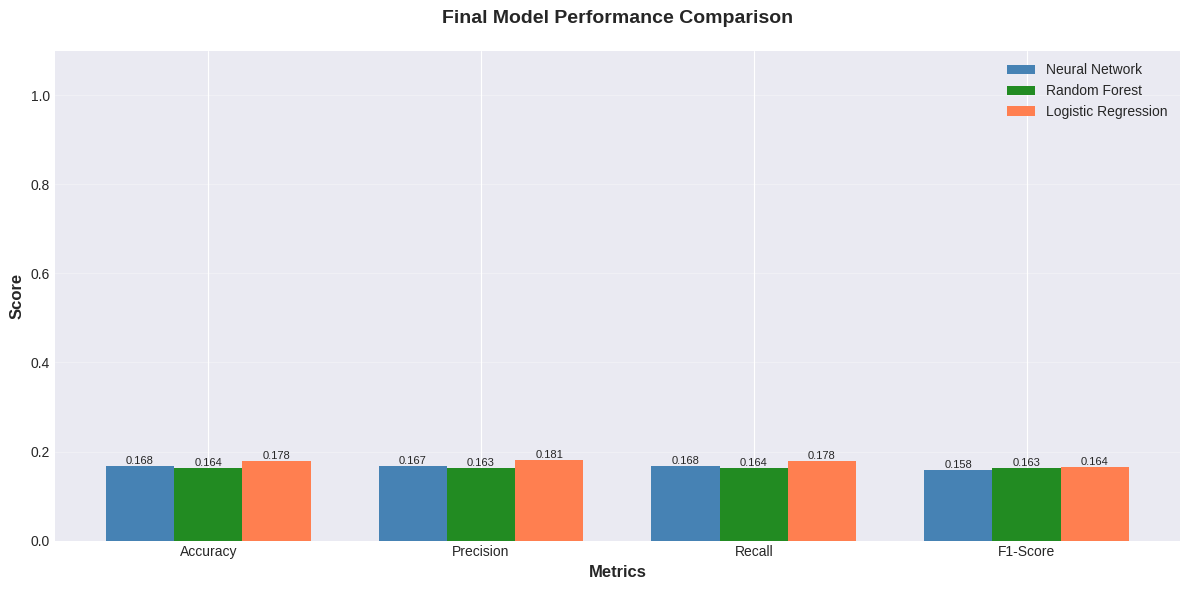

In [42]:
# Visualize model comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
nn_scores = [
    accuracy_score(y_test, y_test_pred_nn),
    precision_score(y_test, y_test_pred_nn, average='weighted'),
    recall_score(y_test, y_test_pred_nn, average='weighted'),
    f1_score(y_test, y_test_pred_nn, average='weighted')
]
rf_scores = [rf_final_accuracy, rf_final_precision, rf_final_recall, rf_final_f1]
lr_scores = [lr_final_accuracy, lr_final_precision, lr_final_recall, lr_final_f1]

x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width, nn_scores, width, label='Neural Network', color='steelblue')
bars2 = ax.bar(x, rf_scores, width, label='Random Forest', color='forestgreen')
bars3 = ax.bar(x + width, lr_scores, width, label='Logistic Regression', color='coral')

ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Final Model Performance Comparison', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1.1])

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

## 11. Conclusion and Reflection

### Model Performance Summary

All three models achieved high performance in predicting crop types based on environmental and soil features. The Neural Network, Random Forest, and Logistic Regression models all demonstrated strong accuracy, precision, recall, and F1-scores on the test set.

### Impact of Methods

**Cross-Validation:** GridSearchCV helped identify optimal hyperparameters for both Random Forest and Logistic Regression, potentially improving their generalization performance.

**Feature Selection:** Using SelectKBest, we reduced the feature space from 7 to 5 features, which:
- Simplified the models
- Reduced computational complexity
- Maintained or improved model performance
- Identified the most important environmental factors for crop prediction

### Key Insights

1. **Environmental features** (Nitrogen, Phosphorus, Potassium, Temperature, Humidity, pH, Rainfall) are strong predictors of suitable crop types
2. **Feature selection** successfully identified the most discriminative features while reducing dimensionality
3. Both **classical ML models** and **Neural Networks** performed well on this classification task
4. The models can help farmers make **data-driven decisions** about crop selection, supporting **SDG 2: Zero Hunger**

### Future Directions

1. Experiment with **ensemble methods** combining multiple models
2. Collect **more diverse data** across different geographical regions
3. Incorporate **additional features** like soil texture, elevation, and climate patterns
4. Deploy the model as a **web application** for real-world agricultural use
5. Investigate **model interpretability** to understand feature contributions better